In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

data['Churn'] = np.where(data['Churn']=='Yes', 1, 0)
data.head()
    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
data.isnull().any()
#No Null Values are present

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

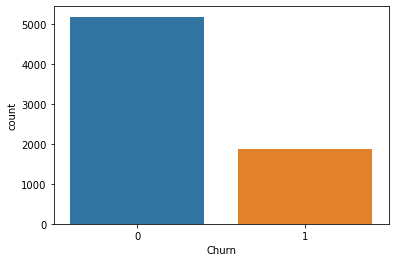

In [4]:
#General Distribution
# sns.countplot(x="Churn",data=data);

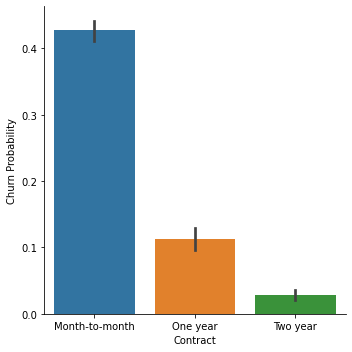

In [5]:
# a = sns.catplot(x="Contract", y="Churn", data=data,kind="bar")
# a.set_ylabels("Churn Probability")

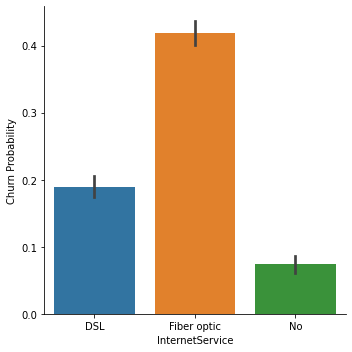

In [6]:
# b = sns.catplot(x="InternetService", y="Churn", data=data,kind="bar")
# b.set_ylabels("Churn Probability")

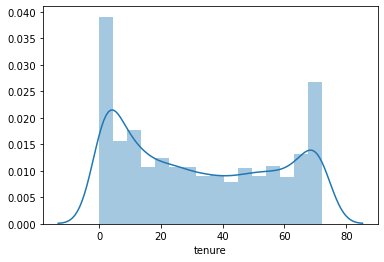

In [7]:
# sns.distplot(data['tenure']);

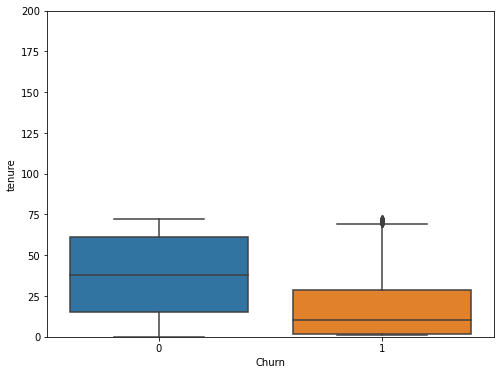

In [8]:
#Box Plot Tenure/Churn
# graph = pd.concat([data['tenure'], data['Churn']], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x='Churn', y="tenure", data=graph)
# fig.axis(ymin=0, ymax=200);

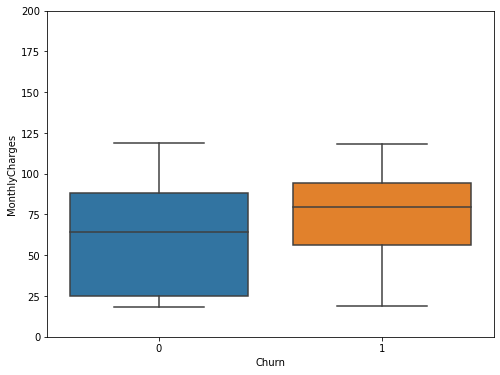

In [9]:
#Box Plot Tenure/Churn
# graph = pd.concat([data['MonthlyCharges'], data['Churn']], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x='Churn', y="MonthlyCharges", data=graph)
# fig.axis(ymin=0, ymax=200);

**Turning Categorical Variables Into Numerically Encoded**

In [10]:
from sklearn.preprocessing import LabelEncoder

cat = (data.dtypes == 'object')
object_cols = list(cat[cat].index)

labeled = data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    labeled[col] = label_encoder.fit_transform(labeled[col])
    

**Correlation Matrix**

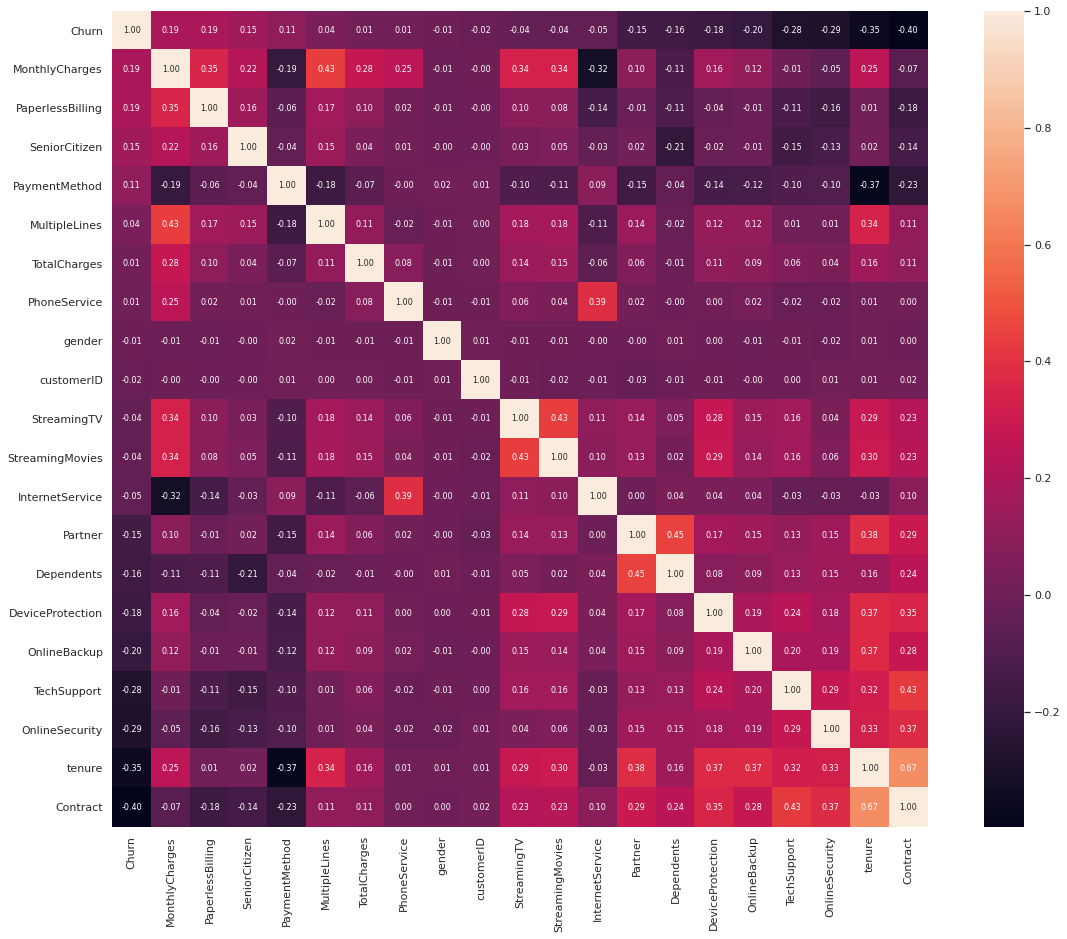

In [11]:
corrmat = labeled.corr()
k = 21
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(labeled[cols].values.T)
# sns.set(font_scale=1)
# plt.figure(figsize=(20,15))
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

### According to correlation results potentially more significant variables:
# (Numerical) MonthlyCharges, Tenure
# (Categorical) PaperlessBilling, Contract, TechSupport, OnlineSecurity, Partner, Dependents, OnlineBackup

**Correlation Between Variables**

In [12]:
labeled.corrwith(labeled.tenure).abs().sort_values(ascending=False).head(10)

tenure              1.000000
Contract            0.671607
Partner             0.379697
DeviceProtection    0.371105
OnlineBackup        0.370876
PaymentMethod       0.370436
Churn               0.352229
MultipleLines       0.343032
OnlineSecurity      0.325468
TechSupport         0.322942
dtype: float64

In [13]:
labeled.corrwith(labeled.MonthlyCharges).abs().sort_values(ascending=False).head(10)

MonthlyCharges      1.000000
MultipleLines       0.433576
PaperlessBilling    0.352150
StreamingTV         0.336706
StreamingMovies     0.335459
InternetService     0.323260
TotalCharges        0.279875
tenure              0.247900
PhoneService        0.247398
SeniorCitizen       0.220173
dtype: float64

In [14]:
labeled.corrwith(labeled.PaperlessBilling).abs().sort_values(ascending=False).head(10)

PaperlessBilling    1.000000
MonthlyCharges      0.352150
Churn               0.191825
Contract            0.176733
MultipleLines       0.165146
OnlineSecurity      0.157641
SeniorCitizen       0.156530
InternetService     0.138625
TechSupport         0.113600
Dependents          0.111377
dtype: float64

In [15]:
labeled.corrwith(labeled.Contract).abs().sort_values(ascending=False).head(10)

Contract            1.000000
tenure              0.671607
TechSupport         0.425367
Churn               0.396713
OnlineSecurity      0.374416
DeviceProtection    0.350277
Partner             0.294806
OnlineBackup        0.280980
Dependents          0.243187
StreamingMovies     0.231226
dtype: float64

In [16]:
labeled.corrwith(labeled.TechSupport).abs().sort_values(ascending=False).head(10)

TechSupport         1.000000
Contract            0.425367
tenure              0.322942
OnlineSecurity      0.285028
Churn               0.282492
DeviceProtection    0.240593
OnlineBackup        0.195748
StreamingMovies     0.161316
StreamingTV         0.161305
SeniorCitizen       0.151268
dtype: float64

**Feature Generation**

In [17]:
#data.MonthlyCharges.describe()
# MonthlyCharges Distribution - Based On How Much Churn

A= data[['MonthlyCharges','Churn','customerID']] 
A['MonthlyCharges_Grouped'] = pd.cut(A.MonthlyCharges,[-np.Infinity,50,80,np.Infinity])

B = A.groupby('MonthlyCharges_Grouped').agg({'customerID':['count'] , 'Churn' : ['sum']})
B

,customerID,Churn
,count,sum
MonthlyCharges_Grouped,,
"(-inf, 50.0]",2299,361
"(50.0, 80.0]",2078,602
"(80.0, inf]",2666,906


In [18]:
# MonthlyCharges Categorical Variable Generation
labeled['0-50_MonthlyCharges']=(labeled.MonthlyCharges.between(0,50,inclusive=True))
labeled['51-80_MonthlyCharges']=(labeled.MonthlyCharges.between(51,80,inclusive=True))
labeled['81+_MonthlyCharges']=(labeled.MonthlyCharges.between(80,99999,inclusive=True))

In [19]:
#data.tenure.describe()
# Tenure Distribution - Based On How Much Churn

A= data[['tenure','Churn','customerID']] 
A['Tenure_Grouped'] = pd.cut(A.tenure,[-np.Infinity,10,20,np.Infinity])

B = A.groupby('Tenure_Grouped').agg({'customerID':['count'] , 'Churn' : ['sum']})
B

,customerID,Churn
,count,sum
Tenure_Grouped,,
"(-inf, 10.0]",1970,968
"(10.0, 20.0]",908,283
"(20.0, inf]",4165,618


In [20]:
# Tenure Categorical Variable Generation
labeled['0-10_Tenure']=(labeled.tenure.between(0,10,inclusive=True))
labeled['10-20_Tenure']=(labeled.tenure.between(11,20,inclusive=True))
labeled['20+_Tenure']=(labeled.tenure.between(21,99999,inclusive=True))

**Model Iterations**

In [21]:
from sklearn.model_selection import train_test_split

y = labeled.Churn
X = labeled.drop(['Churn'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [22]:
X_train = X_train_full[['0-10_Tenure','10-20_Tenure','20+_Tenure','0-50_MonthlyCharges',
                      '51-80_MonthlyCharges','81+_MonthlyCharges','PaperlessBilling','TechSupport',
                     'OnlineSecurity','Partner','Dependents','OnlineBackup','DeviceProtection',
                        'PaperlessBilling','SeniorCitizen','PaymentMethod']].astype(int)

X_valid = X_valid_full[['0-10_Tenure','10-20_Tenure','20+_Tenure','0-50_MonthlyCharges',
                      '51-80_MonthlyCharges','81+_MonthlyCharges','PaperlessBilling','TechSupport',
                     'OnlineSecurity','Partner','Dependents','OnlineBackup','DeviceProtection',
                        'PaperlessBilling','SeniorCitizen','PaymentMethod']].astype(int)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_full,y_train)
accuracy_score = model.score(X_valid_full,y_valid)
print('Accuracy:',accuracy_score*100)

Accuracy: 78.63733144073811


In [24]:
# K-fold cross validation evaluation of Logistic Model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#y = labeled.Churn
#X = labeled.drop(['Churn'], axis=1)

# Cross Validation
model = LogisticRegression()
kfold = KFold(n_splits=4, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy:",(results.mean()*100))

Accuracy: 79.89493798719735


In [25]:
import xgboost

# K-fold cross validation evaluation of XGBoost Model

#y = labeled.Churn
#X = labeled.drop(['Churn'], axis=1)

# Cross Validation
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=4, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy:",(results.mean()*100))

Accuracy: 77.76524024314698


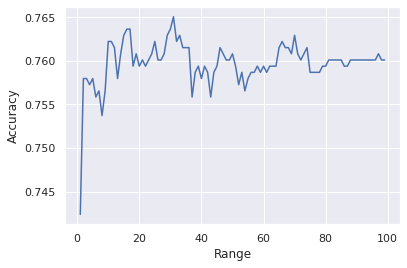

In [26]:
from sklearn.ensemble import RandomForestClassifier

scores = []
for i in range(1,100):
    model_loop = RandomForestClassifier(n_estimators = i, random_state = 1) 
    model_loop.fit(X_train,y_train)
    scores.append(model_loop.score(X_valid,y_valid))
    
plt.plot(range(1,100),scores)
plt.xlabel("Range")
plt.ylabel("Accuracy")
plt.show()


In [27]:
model = RandomForestClassifier(n_estimators = 30, random_state = 1) 
model.fit(X_train,y_train)
accuracy_score = model.score(X_valid,y_valid)
print("Accuracy:",accuracy_score*100)

Accuracy: 76.36621717530163


Contracted Customers

In [28]:
# One Year- Two Year Contracts
contracted = labeled[(labeled.Contract == 1) | (labeled.Contract == 2)]

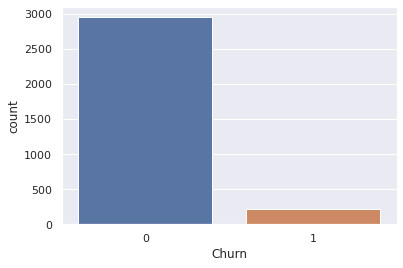

In [29]:
#General Distribution
# sns.countplot(x="Churn",data=contracted);

In [30]:
contracted.corrwith(contracted.Churn).abs().sort_values(ascending=False)

Churn                   1.000000
MonthlyCharges          0.182499
Contract                0.167686
81+_MonthlyCharges      0.159994
0-50_MonthlyCharges     0.140484
StreamingMovies         0.122026
PaperlessBilling        0.110510
StreamingTV             0.109868
OnlineSecurity          0.100523
MultipleLines           0.067754
TotalCharges            0.062405
InternetService         0.057148
Dependents              0.056717
SeniorCitizen           0.050596
TechSupport             0.048633
customerID              0.033229
gender                  0.021588
Partner                 0.019859
tenure                  0.017282
51-80_MonthlyCharges    0.015915
0-10_Tenure             0.015756
PhoneService            0.015628
20+_Tenure              0.009187
DeviceProtection        0.006983
PaymentMethod           0.005111
OnlineBackup            0.003480
10-20_Tenure            0.001361
dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

y = contracted.Churn
X = contracted.drop(['Churn'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)


In [32]:
X_train = X_train_full[['MonthlyCharges','Contract','81+_MonthlyCharges','0-50_MonthlyCharges',
                        'StreamingMovies','PaperlessBilling','StreamingTV','OnlineSecurity','51-80_MonthlyCharges']]


X_valid = X_valid_full[['MonthlyCharges','Contract','81+_MonthlyCharges','0-50_MonthlyCharges',
                        'StreamingMovies','PaperlessBilling','StreamingTV','OnlineSecurity',
                       '51-80_MonthlyCharges']]

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
accuracy_score = model.score(X_valid,y_valid)
print('Accuracy:',accuracy_score)

Accuracy: 0.9400630914826499


In [34]:
# K-fold cross validation evaluation of Logistic Model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#y = labeled.Churn
#X = labeled.drop(['Churn'], axis=1)

# Cross Validation
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy:",(results.mean()*100))

Accuracy: 93.21277402867068


In [35]:
import xgboost

# K-fold cross validation evaluation of XGBoost Model

#y = labeled.Churn
#X = labeled.drop(['Churn'], axis=1)

# Cross Validation
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy:",(results.mean()*100))

Accuracy: 92.0761290580202


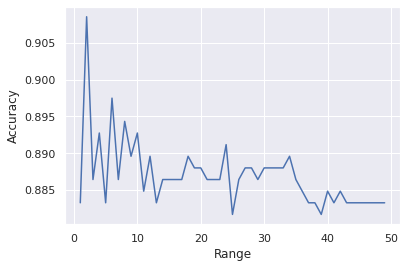

In [36]:
from sklearn.ensemble import RandomForestClassifier

scores = []
for i in range(1,50):
    model_loop = RandomForestClassifier(n_estimators = i, random_state = 1) 
    model_loop.fit(X_train,y_train)
    scores.append(model_loop.score(X_valid,y_valid))
    
plt.plot(range(1,50),scores)
plt.xlabel("Range")
plt.ylabel("Accuracy")
plt.show()


In [37]:
model = RandomForestClassifier(n_estimators = 3, random_state = 1) 
model.fit(X_train,y_train)
accuracy_score = model.score(X_valid,y_valid)
print("Accuracy:",accuracy_score*100)

Accuracy: 88.64353312302839
